<a href="https://colab.research.google.com/github/shantasharma/computer-vision-assignment/blob/main/rnn_utils.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Model
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
import codecs
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from subprocess import check_output
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#declaration of variables

vocab_size = 10000
embedding_dim = 32
max_length = 50
trunc_type='post'
oov_tok = "<OOV>"

In [ ]:
#reading the data from CSV file

train_comments = pd.read_csv("/content/drive/MyDrive/intern_data/CVAssignmentDataset.csv", sep=',', header=0)
train_comments.columns=['label', 'comment_text']
print("num train: ", train_comments.shape[0])
train_comments.head()

num train:  86456


,label,comment_text
0,1,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,1,RT @WinterHavenSun: Winter Haven resident / Al...
2,1,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,1,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,1,RT @Vegalteno: Hurricane season starts on June...


In [ ]:
#cleaning the data

def standardize_text(df, text_field):
    df[text_field] = df[text_field].str.replace(r"http\S+", "")
    df[text_field] = df[text_field].str.replace(r"http", "")
    df[text_field] = df[text_field].str.replace(r"@\S+", "")
    df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df[text_field] = df[text_field].str.replace(r"@", "at")
    df[text_field] = df[text_field].str.lower()
    return df

In [ ]:
train_comments.fillna('_NA_')
train_comments = standardize_text(train_comments, "comment_text")
train_comments.to_csv("/content/drive/MyDrive/intern_data/clean_data.csv")
train_comments.head()


,label,comment_text
0,1,"today, senate dems vote to savetheinternet p..."
1,1,rt winter haven resident alta vista teacher...
2,1,rt noted that hurricane maria has left appr...
3,1,rt meeting with thanks for taking the time...
4,1,rt hurricane season starts on june 1st puert...


In [ ]:
c_comments = pd.read_csv("/content/drive/MyDrive/intern_data/train_clean_data.csv")
c_comments['comment_text'] = c_comments['comment_text'].astype('str')

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
c_comments = pd.read_csv("/content/drive/MyDrive/intern_data/clean_data.csv")
c_comments['comment_text'] = c_comments['comment_text'].astype('str') 
c_comments.dtypes
c_comments["tokens"] = c_comments["comment_text"].apply(tokenizer.tokenize)
# delete Stop Words
c_comments["tokens"] = c_comments["tokens"].apply(lambda vec: [word for word in vec if word not in stop_words])
   
c_comments.head()

,Unnamed: 0,label,comment_text,tokens
0,0,1,"today, senate dems vote to savetheinternet p...","[today, senate, dems, vote, savetheinternet, p..."
1,1,1,rt winter haven resident alta vista teacher...,"[rt, winter, resident, alta, vista, teacher, o..."
2,2,1,rt noted that hurricane maria has left appr...,"[rt, noted, hurricane, maria, left, approximat..."
3,3,1,rt meeting with thanks for taking the time...,"[rt, meeting, thanks, taking, time, meet, ed, ..."
4,4,1,rt hurricane season starts on june 1st puert...,"[rt, hurricane, season, starts, june, 1st, pue..."


In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(c_comments['comment_text'])
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(c_comments['comment_text'])
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

In [ ]:
X_train,X_test, Y_train, Y_test =  train_test_split(padded, Y_new,test_size =0.20,random_state= 4 )

In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]

In [ ]:
input = Input(shape=(max_length,))
modell = Embedding(vocab_size, 32, embeddings_initializer='uniform', input_length=max_length)(input)

In [ ]:
modell = tf.keras.layers.Conv1D(32, kernel_size=1, activation='relu')(modell)
modell = tf.keras.layers.MaxPooling1D()(modell)
modell = Bidirectional (LSTM (256 ,return_sequences=True),merge_mode='concat')(modell)
modell = tf.keras.layers.Dropout(0.01)(modell)
modell = Bidirectional (LSTM (256 ,return_sequences= False),merge_mode='concat')(modell)
modell = tf.keras.layers.Dropout(0.01)(modell)
modell = tf.keras.layers.Flatten()(modell)
modell = tf.keras.layers.Dropout(0.01)(modell)
modell = tf.keras.layers.Dense(512 ,activation='relu')(modell)
output = tf.keras.layers.Dense(1,activation='sigmoid')(modell)
modell = Model(input,output)
modell.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
modell.summary()

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        [(None, 50)]              0         
_________________________________________________________________
embedding_36 (Embedding)     (None, 50, 32)            320000    
_________________________________________________________________
conv1d_33 (Conv1D)           (None, 50, 32)            1056      
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 25, 32)            0         
_________________________________________________________________
bidirectional_37 (Bidirectio (None, 25, 512)           591872    
_________________________________________________________________
dropout_21 (Dropout)         (None, 25, 512)           0         
_________________________________________________________________
bidirectional_38 (Bidirectio (None, 512)               157

In [149]:
NUM_EPOCHS = 5
history = modell.fit(X_train,Y_train, epochs=NUM_EPOCHS, validation_data=(X_test, Y_test))

Epoch 1/5
2162/2162 [==============================] - 1337s 616ms/step - loss: 0.5887 - accuracy: 0.6649 - val_loss: 0.4922 - val_accuracy: 0.7433
Epoch 2/5
2162/2162 [==============================] - 1336s 618ms/step - loss: 0.4337 - accuracy: 0.7875 - val_loss: 0.4902 - val_accuracy: 0.7498
Epoch 3/5
2162/2162 [==============================] - 1332s 616ms/step - loss: 0.3926 - accuracy: 0.8097 - val_loss: 0.5051 - val_accuracy: 0.7509
Epoch 4/5
2162/2162 [==============================] - 1350s 624ms/step - loss: 0.3593 - accuracy: 0.8307 - val_loss: 0.5141 - val_accuracy: 0.7483
Epoch 5/5
2162/2162 [==============================] - 1346s 623ms/step - loss: 0.3308 - accuracy: 0.8440 - val_loss: 0.5525 - val_accuracy: 0.7461


**Analysis**

Text(0.5, 1.0, 'Traning Vs Validation Accuracy')

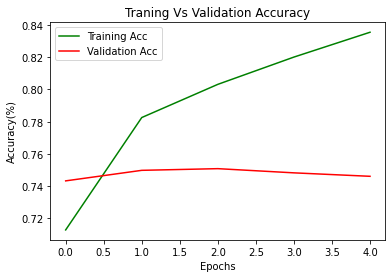

In [155]:
plt.plot(history.history['accuracy'], 'g')
plt.plot(history.history['val_accuracy'], 'r')
plt.legend(['Training Acc', 'Validation Acc'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy(%)")
plt.title('Traning Vs Validation Accuracy')


In [173]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
import itertools

y_test = []
prediction = model.predict(X_test)
for i in prediction:
  if i < 0.5:
    y_test.append(0)
  else:
    y_test.append(1)

    
cm = confusion_matrix(y_true = Y_test, y_pred = y_test)

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[6684 2206]
 [2359 6043]]


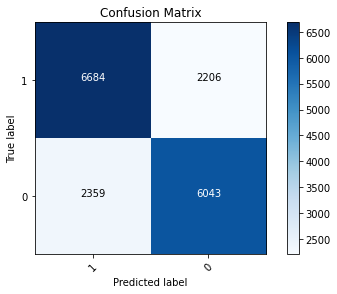

In [176]:
plot_confusion_matrix(cm=cm, classes= [1, 0], title='Confusion Matrix')

In [179]:
# matthews_corrcoef for validation
validation = matthews_corrcoef(Y_test, y_test)

print("Mathews correlation coeff for validation data is : %f", validation)

Mathews correlation coeff for validation data is : %f 0.4713991092050527
